In [50]:
# Data analysis and data preparation
import pandas as pd
import numpy as np
import random as rnd #for machine learning

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
future50_df = pd.read_csv('Future50.csv')

future50_df.tail (10)

,Rank,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising
40,41,Blue Sushi Sake Grill,"Omaha, Neb.",49,19.5%,14,16.7%,3500,No
41,42,The Human Bean,"Medford, Ore.",47,19.0%,97,19.8%,535,Yes
42,43,Spitz Mediterranean Street Food,"Los Angeles, Calif.",28,18.8%,11,10.0%,2700,No
43,44,Tacos 4 Life,"Conway, Ark.",25,18.4%,16,6.7%,1620,Yes
44,45,Pita Mediterranean Street Food,"Fairburn, Ga.",38,17.8%,32,10.3%,1260,Yes
45,46,LA Crawfish,"McAllen, Texas",48,17.6%,25,13.6%,2050,Yes
46,47,&pizza,"Washington, D.C.",45,17.1%,35,9.4%,1350,No
47,48,Super Duper Burgers,"San Francisco, Calif.",39,16.9%,16,14.3%,2630,No
48,49,StoneFire Grill,"Agoura Hills, Calif.",31,16.0%,13,8.3%,2550,No
49,50,Gus's World Famous Fried Chicken,"Memphis, Tenn.",44,14.4%,28,7.7%,1600,Yes


In [34]:
future50_df.dtypes

Rank            int64
Restaurant     object
Location       object
Sales           int64
YOY_Sales      object
Units           int64
YOY_Units      object
Unit_Volume     int64
Franchising    object
dtype: object

YOY_Sales and YOY_Units are objects because of the % sign. We need to erase the % and change it to the appropriate numerical data type, in case we need to use these values for computation.

In [35]:
future50_df.YOY_Sales = [x.strip('%') for x in future50_df.YOY_Sales]
future50_df.YOY_Units = [x.strip('%') for x in future50_df.YOY_Units]
future50_df.tail(10)

,Rank,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising
40,41,Blue Sushi Sake Grill,"Omaha, Neb.",49,19.5,14,16.7,3500,No
41,42,The Human Bean,"Medford, Ore.",47,19.0,97,19.8,535,Yes
42,43,Spitz Mediterranean Street Food,"Los Angeles, Calif.",28,18.8,11,10.0,2700,No
43,44,Tacos 4 Life,"Conway, Ark.",25,18.4,16,6.7,1620,Yes
44,45,Pita Mediterranean Street Food,"Fairburn, Ga.",38,17.8,32,10.3,1260,Yes
45,46,LA Crawfish,"McAllen, Texas",48,17.6,25,13.6,2050,Yes
46,47,&pizza,"Washington, D.C.",45,17.1,35,9.4,1350,No
47,48,Super Duper Burgers,"San Francisco, Calif.",39,16.9,16,14.3,2630,No
48,49,StoneFire Grill,"Agoura Hills, Calif.",31,16.0,13,8.3,2550,No
49,50,Gus's World Famous Fried Chicken,"Memphis, Tenn.",44,14.4,28,7.7,1600,Yes


In [36]:
future50_df['YOY_Sales'] = future50_df['YOY_Sales'].astype(float)
future50_df['YOY_Units'] = future50_df['YOY_Units'].astype(float)
future50_df.dtypes

Rank             int64
Restaurant      object
Location        object
Sales            int64
YOY_Sales      float64
Units            int64
YOY_Units      float64
Unit_Volume      int64
Franchising     object
dtype: object

In [37]:
future50_df.tail(10)

,Rank,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising
40,41,Blue Sushi Sake Grill,"Omaha, Neb.",49,19.5,14,16.7,3500,No
41,42,The Human Bean,"Medford, Ore.",47,19.0,97,19.8,535,Yes
42,43,Spitz Mediterranean Street Food,"Los Angeles, Calif.",28,18.8,11,10.0,2700,No
43,44,Tacos 4 Life,"Conway, Ark.",25,18.4,16,6.7,1620,Yes
44,45,Pita Mediterranean Street Food,"Fairburn, Ga.",38,17.8,32,10.3,1260,Yes
45,46,LA Crawfish,"McAllen, Texas",48,17.6,25,13.6,2050,Yes
46,47,&pizza,"Washington, D.C.",45,17.1,35,9.4,1350,No
47,48,Super Duper Burgers,"San Francisco, Calif.",39,16.9,16,14.3,2630,No
48,49,StoneFire Grill,"Agoura Hills, Calif.",31,16.0,13,8.3,2550,No
49,50,Gus's World Famous Fried Chicken,"Memphis, Tenn.",44,14.4,28,7.7,1600,Yes


Everything seems to be ready for analysis.

In [38]:
future50_df.head(50)

,Rank,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising
0,1,Evergreens,"Seattle, Wash.",24,130.5,26,116.7,1150,No
1,2,Clean Juice,"Charlotte, N.C.",44,121.9,105,94.4,560,Yes
2,3,Slapfish,"Huntington Beach, Calif.",21,81.0,21,90.9,1370,Yes
3,4,Clean Eatz,"Wilmington, N.C.",25,79.7,46,58.6,685,Yes
4,5,Pokeworks,"Irvine, Calif.",49,77.1,50,56.3,1210,Yes
5,6,Playa Bowls,"Belmar, N.J.",39,62.9,76,28.8,580,Yes
6,7,The Simple Greek,"Blue Bell, Pa.",24,52.5,36,33.3,775,Yes
7,8,Melt Shop,"New York, N.Y.",20,39.6,19,35.7,1260,Yes
8,9,Creamistry,"Yorba Linda, Calif.",24,36.8,60,27.7,465,Yes
9,10,Joella's Hot Chicken,"Louisville, Ky.",29,35.5,17,30.8,1930,No


Based on the values above, it seems that the main characteristic used to rank these restaurants is YOY_Sales or the year on year sales increase in %. Additionally, there seems to be some locations that repeat. That may be a big factor as well. Lastly, there also seems to be a good amount of both franchises and not franchises. It would be interesting to see if one category dominates the other or not.

<AxesSubplot:title={'center':'Number of Restaurants vs Location of Origin'}, xlabel='Location', ylabel='Number of restaurants'>

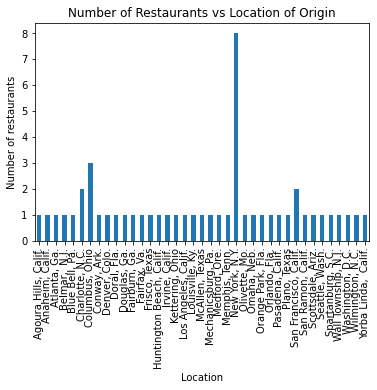

In [79]:
future50_df.groupby('Location').size().plot(kind='bar', ylabel='Number of restaurants', title='Number of Restaurants vs Location of Origin')

Majority of the 50 restaurants which are predicted to be successful in the near future originated from New York, N.Y., which is known to be a busy and crowded place with a very diverse population.

<AxesSubplot:ylabel='Is it a Franchise?'>

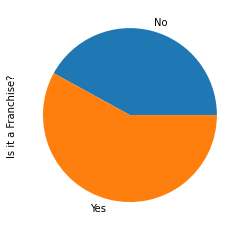

In [76]:
future50_df.groupby('Franchising').size().plot(kind='pie',ylabel='Is it a Franchise?')

These 50 restaurants with great potential are mostly franchises, rather than completely new restaurants. One main reason for this may be because restaurants which are franchises are seen to have more stability since they already have a well-established system and proper financial backing, compared to restaurants that are just starting in the industry and still in the process of testing their concept and target audience.

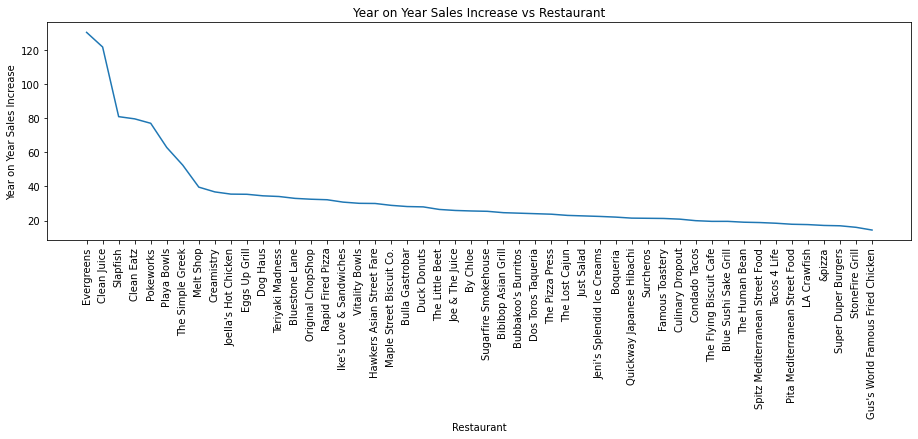

In [73]:
x = future50_df.Restaurant
y = future50_df.YOY_Sales
plt.figure()
plt.plot(x,y)
plt.xticks(rotation='vertical')
plt.gcf().subplots_adjust(left=0, right=2)
plt.title('Year on Year Sales Increase vs Restaurant')
plt.ylabel('Year on Year Sales Increase' )
plt.xlabel('Restaurant')
plt.show()

The figure above shows that the Year on Year Sales Increase in % has the greatest effect on the rank of each of the restaurants, where Evergreens (top 1 restaurant) has the biggest number while Gu's World Famous Fried Chicken (last restaurant in the list) has the least percentage.